<a href="https://colab.research.google.com/github/Udaykamal2005/OIBSIP/blob/main/Project_2_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run once in Colab
!pip install -q scikit-learn seaborn matplotlib plotly kmodes


In [ ]:
# Upload using your method
from google.colab import files
import io, sys
import pandas as pd, numpy as np

uploaded = files.upload()   # choose your CSV (e.g. ifood_df.csv)
# If you prefer to type the filename manually replace the next line with your filename string
filename = next(iter(uploaded))
print("Uploaded file:", filename)

# Try reading with common options (robust)
try:
    df = pd.read_csv(filename)             # attempt direct read (works in Colab after upload)
except Exception as e:
    try:
        df = pd.read_csv(io.BytesIO(uploaded[filename]))  # fallback to bytes IO
    except Exception as e2:
        df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1', engine='python')

print("DataFrame shape:", df.shape)
df.head()


Saving ifood_df.csv to ifood_df.csv
Uploaded file: ifood_df.csv
DataFrame shape: (2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
# Quick checks
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

# Normalize column names to safe format
df.columns = [str(c).strip().lower().replace(' ', '_').replace('-','_') for c in df.columns]
print("\nNormalized columns:", df.columns.tolist())


Columns: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']

Dtypes:
 Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDe

In [ ]:
# Heuristic: detect date columns and numeric columns with non-numeric characters
# Adjust these guesses after you see df.columns
possible_date_cols = [c for c in df.columns if 'date' in c or 'created' in c or 'order' in c]
possible_num_cols = [c for c in df.columns if any(k in c for k in ['amount','price','total','revenue','quantity','cost','count','value','salary','calories','sodium'])]

# Try parse dates
for c in possible_date_cols:
    try:
        df[c] = pd.to_datetime(df[c])
        print("Parsed date:", c)
    except:
        pass

# Coerce numeric-like columns: remove non-digit chars, then to_numeric
import re
def coerce_numeric(col):
    before_nonnull = df[col].notnull().sum()
    df[col] = df[col].astype(str).str.replace(r'[^\d\.\-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    after_nonnull = df[col].notnull().sum()
    print(f"Coerced {col}: non-null before {before_nonnull} -> after {after_nonnull}")

for c in possible_num_cols:
    if c in df.columns:
        coerce_numeric(c)

# Show result
display(df.dtypes)
display(df.head())


Coerced z_costcontact: non-null before 2205 -> after 2205
Coerced z_revenue: non-null before 2205 -> after 2205
Coerced mnttotal: non-null before 2205 -> after 2205


,0
income,float64
kidhome,int64
teenhome,int64
recency,int64
mntwines,int64
mntfruits,int64
mntmeatproducts,int64
mntfishproducts,int64
mntsweetproducts,int64
mntgoldprods,int64


,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,marital_together,marital_widow,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,mnttotal,mntregularprods,acceptedcmpoverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
# Heuristic: detect date columns and numeric columns with non-numeric characters
# Adjust these guesses after you see df.columns
possible_date_cols = [c for c in df.columns if 'date' in c or 'created' in c or 'order' in c]
possible_num_cols = [c for c in df.columns if any(k in c for k in ['amount','price','total','revenue','quantity','cost','count','value','salary','calories','sodium'])]

# Try parse dates
for c in possible_date_cols:
    try:
        df[c] = pd.to_datetime(df[c])
        print("Parsed date:", c)
    except:
        pass

# Coerce numeric-like columns: remove non-digit chars, then to_numeric
import re
def coerce_numeric(col):
    before_nonnull = df[col].notnull().sum()
    df[col] = df[col].astype(str).str.replace(r'[^\d\.\-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    after_nonnull = df[col].notnull().sum()
    print(f"Coerced {col}: non-null before {before_nonnull} -> after {after_nonnull}")

for c in possible_num_cols:
    if c in df.columns:
        coerce_numeric(c)

# Show result
display(df.dtypes)
display(df.head())


Coerced z_costcontact: non-null before 2205 -> after 2205
Coerced z_revenue: non-null before 2205 -> after 2205
Coerced mnttotal: non-null before 2205 -> after 2205


,0
income,float64
kidhome,int64
teenhome,int64
recency,int64
mntwines,int64
mntfruits,int64
mntmeatproducts,int64
mntfishproducts,int64
mntsweetproducts,int64
mntgoldprods,int64


,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,marital_together,marital_widow,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,mnttotal,mntregularprods,acceptedcmpoverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
# 1) Drop exact duplicates
dups = df.duplicated().sum()
print("Exact duplicate rows:", dups)
if dups>0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Dropped duplicates. New shape:", df.shape)

# 2) Basic missing-value strategy (display and fill simple numeric medians)
print("\nMissing values per column (again):")
display(df.isnull().sum())

# Fill numeric columns with median (you may change per column strategy)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    med = df[c].median()
    df[c] = df[c].fillna(med)

# For date columns fill with earliest date or leave as is; for categorical fill with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    df[c] = df[c].fillna('Unknown')

print("After basic filling, missing counts:")
display(df.isnull().sum())


Exact duplicate rows: 184
Dropped duplicates. New shape: (2021, 39)

Missing values per column (again):


,0
income,0
kidhome,0
teenhome,0
recency,0
mntwines,0
mntfruits,0
mntmeatproducts,0
mntfishproducts,0
mntsweetproducts,0
mntgoldprods,0


After basic filling, missing counts:


,0
income,0
kidhome,0
teenhome,0
recency,0
mntwines,0
mntfruits,0
mntmeatproducts,0
mntfishproducts,0
mntsweetproducts,0
mntgoldprods,0


,count,mean,std,min,25%,50%,75%,max
income,2021.0,51687.258783,20713.046401,1730.0,35416.0,51412.0,68274.0,113734.0
kidhome,2021.0,0.443345,0.536196,0.0,0.0,0.0,1.0,2.0
teenhome,2021.0,0.509649,0.546393,0.0,0.0,0.0,1.0,2.0
recency,2021.0,48.880752,28.950917,0.0,24.0,49.0,74.0,99.0
mntwines,2021.0,306.492331,337.603877,0.0,24.0,178.0,507.0,1493.0
mntfruits,2021.0,26.364671,39.776518,0.0,2.0,8.0,33.0,199.0
mntmeatproducts,2021.0,166.059871,219.869126,0.0,16.0,68.0,230.0,1725.0
mntfishproducts,2021.0,37.603662,54.892196,0.0,3.0,12.0,50.0,259.0
mntsweetproducts,2021.0,27.268679,41.575454,0.0,1.0,8.0,34.0,262.0
mntgoldprods,2021.0,43.921821,51.678211,0.0,9.0,25.0,56.0,321.0


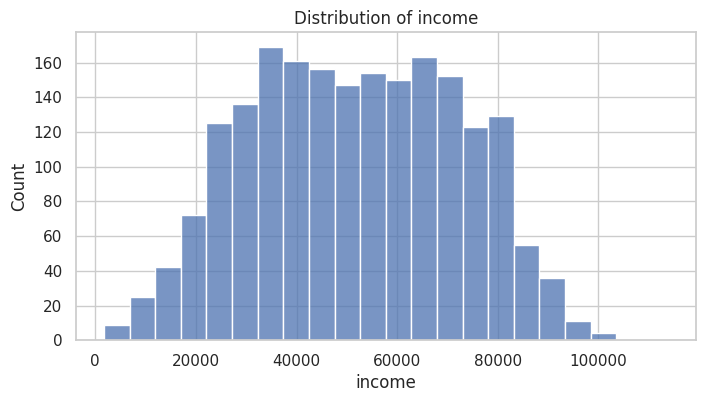

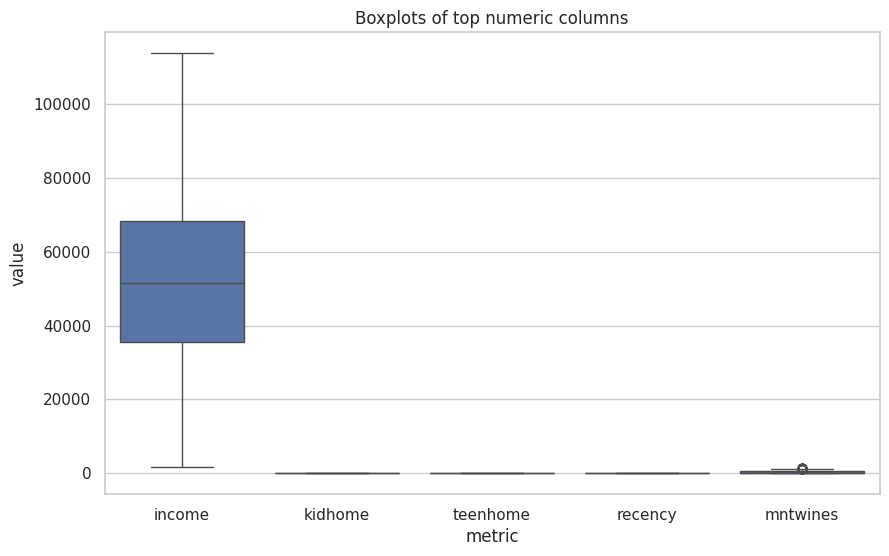

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

# Numeric summary
display(df.select_dtypes(include=[np.number]).describe().T)

# Categorical top values example (pick 3 categorical cols)
for c in cat_cols[:3]:
    print(f"\nTop values in {c}:")
    display(df[c].value_counts().head(10))

# Example histogram for a numeric column (pick first numeric col)
if num_cols:
    col = num_cols[0]
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=False)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplot of a few numeric columns (if available)
plot_cols = num_cols[:5]
if plot_cols:
    plt.figure(figsize=(10,6))
    df_plot = df[plot_cols].melt(var_name='metric', value_name='value')
    sns.boxplot(x='metric', y='value', data=df_plot)
    plt.title("Boxplots of top numeric columns")
    plt.show()


In [ ]:
import pandas as pd

# Create a customer_id column if not already present, using the index
if 'customer_id' not in df.columns:
    df['customer_id'] = df.index

# Define the columns to be used for RFM
cust_col_name = 'customer_id' # Using the newly created ID
recency_col_name = 'recency' # Existing recency column
monetary_col_name = 'mnttotal' # Existing total monetary column

# Calculate frequency by summing purchase counts
purchase_cols = [c for c in df.columns if 'num' in c and 'purchases' in c]
df['frequency'] = df[purchase_cols].sum(axis=1)

# Create the RFM DataFrame using the identified/derived columns
rfm = df[[cust_col_name, recency_col_name, 'frequency', monetary_col_name]].copy()
rfm.rename(columns={recency_col_name: 'recency', monetary_col_name: 'monetary'}, inplace=True)

# Quick view
display(rfm.describe().T)
rfm.head()

,count,mean,std,min,25%,50%,75%,max
customer_id,2021.0,1010.000000,583.556767,0.0,505.0,1010.0,1515.0,2020.0
recency,2021.0,48.880752,28.950917,0.0,24.0,49.0,74.0,99.0
frequency,2021.0,14.897575,7.598261,0.0,8.0,15.0,21.0,43.0
monetary,2021.0,563.789213,576.775749,4.0,55.0,343.0,964.0,2491.0


,customer_id,recency,frequency,monetary
0,0,58,25,1529
1,1,38,6,21
2,2,26,21,734
3,3,26,8,48
4,4,94,19,407


In [ ]:
# Score RFM into 1-4 (4 = best) using quartiles
rfm['r_score'] = pd.qcut(rfm['recency'], 4, labels=[4,3,2,1]).astype(int)    # more recent -> higher score
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['m_score'] = pd.qcut(rfm['monetary'], 4, labels=[1,2,3,4]).astype(int)

rfm['rfm_score'] = rfm['r_score'].map(str) + rfm['f_score'].map(str) + rfm['m_score'].map(str)
rfm['rfm_sum'] = rfm[['r_score','f_score','m_score']].sum(axis=1)

# Show top/bottom customers by RFM
print("Top 10 RFM customers (highest rfm_sum):")
display(rfm.sort_values('rfm_sum', ascending=False).head(10))
print("Bottom 10 RFM customers:")
display(rfm.sort_values('rfm_sum', ascending=True).head(10))


Top 10 RFM customers (highest rfm_sum):


,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,rfm_sum
14,14,23,26,1270,4,4,4,444,12
812,812,5,26,1029,4,4,4,444,12
47,47,2,29,1661,4,4,4,444,12
863,863,24,31,1024,4,4,4,444,12
724,724,6,29,1243,4,4,4,444,12
831,831,12,28,1158,4,4,4,444,12
707,707,0,28,1150,4,4,4,444,12
710,710,20,25,1713,4,4,4,444,12
62,62,19,32,1236,4,4,4,444,12
989,989,3,27,1113,4,4,4,444,12


Bottom 10 RFM customers:


,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,rfm_sum
2005,2005,88,4,11,1,1,1,111,3
967,967,79,7,46,1,1,1,111,3
60,60,75,5,19,1,1,1,111,3
1923,1923,79,4,8,1,1,1,111,3
1424,1424,91,5,18,1,1,1,111,3
490,490,77,5,31,1,1,1,111,3
1442,1442,77,4,15,1,1,1,111,3
1440,1440,89,6,20,1,1,1,111,3
1480,1480,78,7,38,1,1,1,111,3
561,561,94,6,33,1,1,1,111,3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = rfm[['recency','frequency','monetary']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try k = 2..6 and show silhouette scores
sil_scores = {}
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
print("Silhouette scores by k:", sil_scores)

# Choose the best k from silhouette
best_k = max(sil_scores, key=sil_scores.get)
print("Best k by silhouette:", best_k)

# Fit final model
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
rfm['cluster'] = km.fit_predict(X_scaled)

# Show cluster sizes and cluster centers (inverse transform)
print("Cluster sizes:")
display(rfm['cluster'].value_counts().sort_index())

centers = scaler.inverse_transform(km.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['recency','frequency','monetary'])
print("Cluster centers (original scale):")
display(centers_df)


Silhouette scores by k: {2: np.float64(0.4130784587256556), 3: np.float64(0.3705647371975433), 4: np.float64(0.372353544500353), 5: np.float64(0.3676993219380647), 6: np.float64(0.3561174423694332)}
Best k by silhouette: 2
Cluster sizes:


,count
cluster,
0,1071
1,950


Cluster centers (original scale):


,recency,frequency,monetary
0,48.737628,8.903828,115.630252
1,49.042105,21.654737,1069.029474


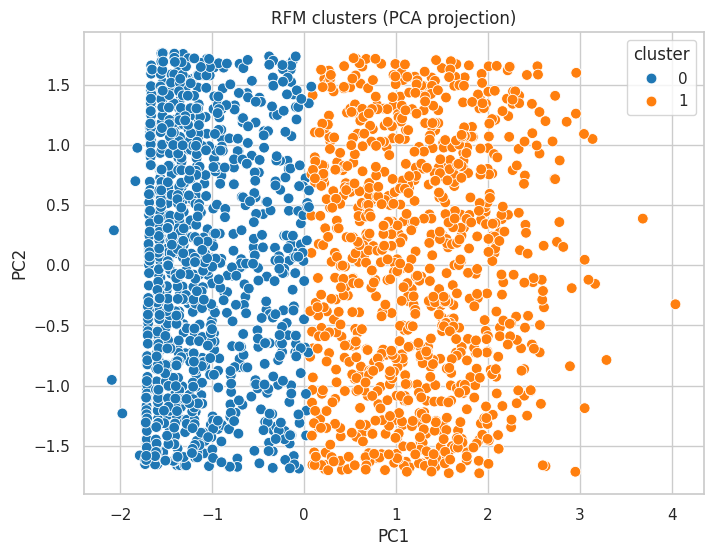

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=rfm['cluster'], palette='tab10', s=60)
plt.title("RFM clusters (PCA projection)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='cluster')
plt.show()


In [ ]:
# Merge cluster labels with original RFM features and optionally with original customer metadata
profile = rfm.groupby('cluster').agg({
    'recency': ['mean','median'],
    'frequency': ['mean','median'],
    'monetary': ['mean','median','count']
})
display(profile)

# Export cluster summary
profile.to_csv("rfm_cluster_profile.csv", index=True)
print("Saved cluster profile to rfm_cluster_profile.csv")
from google.colab import files as gfiles
gfiles.download("rfm_cluster_profile.csv")


recency         frequency            monetary              
              mean median       mean median         mean  median count
cluster                                                               
0        48.737628   49.0   8.903828    8.0   115.630252    61.0  1071
1        49.042105   50.0  21.654737   21.0  1069.029474  1006.0   950

Saved cluster profile to rfm_cluster_profile.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rfm_out = rfm.copy()
rfm_out.to_csv("rfm_customers_with_cluster.csv", index=False)
print("Saved rfm_customers_with_cluster.csv; shape:", rfm_out.shape)
from google.colab import files as gfiles
gfiles.download("rfm_customers_with_cluster.csv")


Saved rfm_customers_with_cluster.csv; shape: (2021, 10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv(filename, encoding='latin1', sep=',', engine='python')
